In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

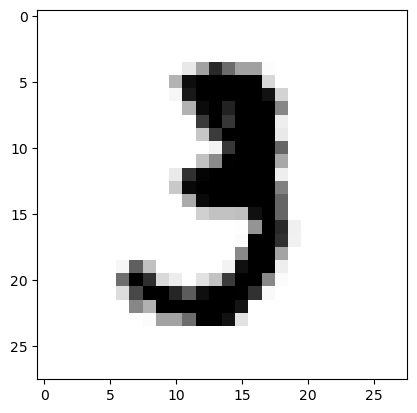

In [3]:
plt.imshow(x_train[10], cmap='Greys')
plt.show()

In [4]:
x_train=x_train/255
x_test=x_test/255

x_test_re = x_test.reshape(10000, 784)
x_train_re = x_train.reshape(60000, 784)

num_classes = 10
input_shape = (784)
mnist_dim =  28
conv_out_dim =  26
kernel_size = 3
dims = [128,256,10]

In [5]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
#Define the layers of the model
model = tf.keras.Sequential([tf.keras.Input(shape=input_shape), tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dense(256, activation="relu"),tf.keras.layers.Dense(num_classes, activation="softmax")])
    

In [7]:
#print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136074 (531.54 KB)
Trainable params: 136074 (531.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#train model
batch_size = 128
epochs = 30
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train_re, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 2s 2ms/step - loss: 0.3237 - accuracy: 0.9083 - val_loss: 0.1196 - val_accuracy: 0.9647
Epoch 2/30
422/422 [==============================] - 1s 2ms/step - loss: 0.1247 - accuracy: 0.9626 - val_loss: 0.1022 - val_accuracy: 0.9700
Epoch 3/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9741 - val_loss: 0.0945 - val_accuracy: 0.9723
Epoch 4/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0820 - val_accuracy: 0.9747
Epoch 5/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0776 - val_accuracy: 0.9795
Epoch 6/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0753 - val_accuracy: 0.9793
Epoch 7/30
422/422 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0798 - val_accuracy: 0.9798
Epoch 

In [9]:
score = model.evaluate(x_test_re, y_test, verbose=0)
print("Model loss:", score[0])
print("Model accuracy:", score[1])

Model loss: 0.13449294865131378
Model accuracy: 0.9764999747276306


1/1 [==============================] - 0s 57ms/step


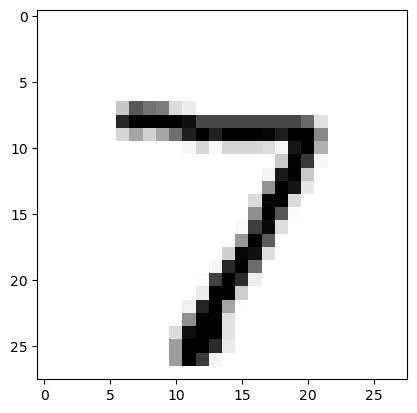

[4.58996249e-16 1.34644741e-16 2.37599024e-10 9.20807992e-15
 4.40510960e-30 1.85347807e-18 1.92703889e-27 1.00000000e+00
 1.08591535e-13 1.50994343e-13] ----> 7


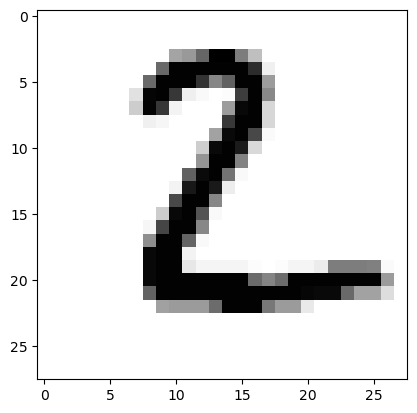

[3.9879072e-11 2.1771240e-13 1.0000000e+00 4.8243524e-16 2.1278886e-31
 1.1298430e-21 4.2367868e-16 9.6007215e-20 8.5985803e-13 2.9162314e-25] ----> 2


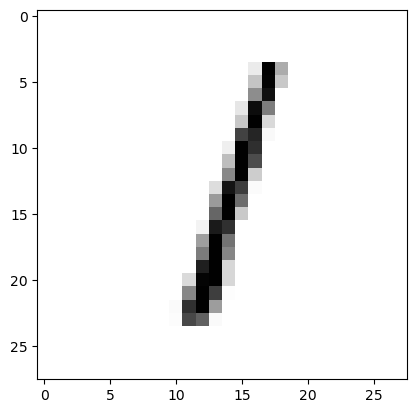

[8.5409162e-12 9.9999988e-01 1.0104523e-09 3.5323747e-15 1.6129049e-11
 8.6539805e-16 5.4916427e-12 8.4775245e-08 1.1960806e-08 1.0057575e-15] ----> 1


In [10]:
probs = model.predict(x_test_re[:3])
preds = np.argmax(probs, axis=1)
for i in range(3):
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()
    print(probs[i], "---->", preds[i])

In [12]:
import time

while True:
    start_time = time.time()
    model.predict(x_test_re[:3])
    end_ts = time.time()

# print the time difference in between start and end timestamps in seconds
print(f"Prediction Time [s]: {(end_ts-start_ts):.3f}")

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


KeyboardInterrupt: 

In [12]:
#Save model to start quantization process
model.save("tf_mnist_fp32.h5")